In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist

from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

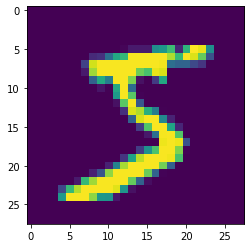

In [3]:
plt.imshow(x_train[0])

Text(0.5, 1.0, '4')

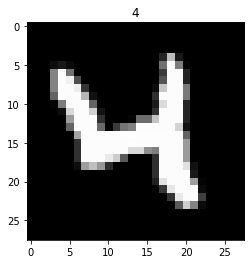

In [4]:
plt.imshow(x_train[20], cmap="gray")
plt.title(y_train[20])

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [7]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [8]:
x_train /= 255
x_test /= 255

In [9]:
y_train = np_utils.to_categorical(y_train, 10) # 10 classes: 0~9
y_test = np_utils.to_categorical(y_test, 10) # 10 classes: 0~9

In [10]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [11]:
pd.DataFrame(y_train).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
pd.DataFrame(y_test).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
modelo = Sequential()

W0828 18:50:16.334531 20528 deprecation_wrapper.py:119] From C:\Users\A8061267\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [16]:
modelo.add(Dense(units=64, activation="relu", input_dim=784))
modelo.add(Dropout(0.2)) # Droupout 20%: Zera 20% das entradas, para evitar overfitting devido ao excesso de entradas
modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=10, activation="softmax"))

W0828 18:50:16.366514 20528 deprecation_wrapper.py:119] From C:\Users\A8061267\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 18:50:16.370011 20528 deprecation_wrapper.py:119] From C:\Users\A8061267\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 18:50:16.390993 20528 deprecation_wrapper.py:119] From C:\Users\A8061267\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0828 18:50:16.399985 20528 deprecation.py:506] From C:\Users\A8061267\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions fo

In [17]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

In [18]:
modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

W0828 18:50:16.517382 20528 deprecation_wrapper.py:119] From C:\Users\A8061267\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 18:50:16.547854 20528 deprecation_wrapper.py:119] From C:\Users\A8061267\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
historico = modelo.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

W0828 18:50:16.720204 20528 deprecation.py:323] From C:\Users\A8061267\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.4437 - acc: 0.8653 - val_loss: 0.1458 - val_acc: 0.9560
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2193 - acc: 0.9361 - val_loss: 0.1308 - val_acc: 0.9600
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.1829 - acc: 0.9469 - val_loss: 0.1144 - val_acc: 0.9675
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1655 - acc: 0.9520 - val_loss: 0.1007 - val_acc: 0.9720
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1462 - acc: 0.9570 - val_loss: 0.0973 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1395 - acc: 0.9594 - val_loss: 0.0966 - val_acc: 0.9709
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1292 - acc: 0.9617 - val_loss: 0.0953 - val_ac

In [20]:
historico.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

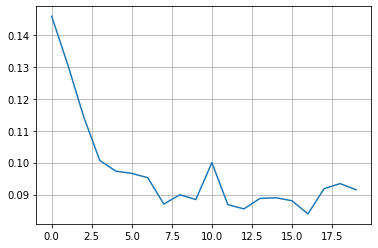

In [21]:
plt.plot(historico.history["val_loss"])
plt.grid()

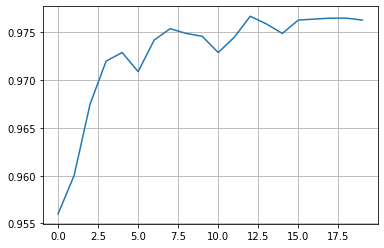

In [22]:
plt.plot(historico.history["val_acc"])
plt.grid()

In [23]:
previsoes = modelo.predict(x_test)

for i in range(5):
    print(previsoes[i],"\n")

[4.4715300e-13 6.4391639e-09 1.2051594e-07 2.5748247e-07 7.4847559e-11
 1.3349085e-09 5.0717845e-19 9.9999940e-01 2.1052664e-10 2.6594529e-07] 

[9.7784059e-11 4.9654892e-07 9.9999833e-01 1.2433825e-06 2.0262789e-09
 1.0924077e-09 2.3938873e-09 8.1358487e-10 5.9388161e-11 1.1526036e-15] 

[1.8084888e-11 9.9999642e-01 4.2554021e-07 4.5412494e-07 9.0360786e-08
 3.4633445e-07 1.5901730e-07 2.7337151e-07 1.7842764e-06 2.8296271e-10] 

[9.9999797e-01 5.0279656e-14 7.9124447e-07 7.5710025e-09 3.6083201e-09
 8.0911612e-08 7.2344494e-07 4.7257029e-08 2.5886207e-09 3.4900606e-07] 

[1.1402793e-06 4.2411225e-06 1.3388474e-04 1.0650662e-06 9.9892789e-01
 8.9858707e-07 5.1551369e-06 2.8025281e-05 8.0377660e-08 8.9764886e-04] 



In [24]:
y_test_matriz = [np.argmax(i) for i in y_test]
np.array(y_test_matriz)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_previsoes_matriz = [np.argmax(i) for i in previsoes]
np.array(y_previsoes_matriz)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
matriz = confusion_matrix(y_test_matriz, y_previsoes_matriz)
print(matriz)

[[ 973    1    0    0    0    0    4    1    0    1]
 [   0 1128    2    0    0    0    2    0    3    0]
 [   1    1 1012    4    3    0    5    4    2    0]
 [   3    1    3  988    0    3    0    6    2    4]
 [   2    0    1    0  965    0    7    1    1    5]
 [   2    0    0   12    1  865    5    1    4    2]
 [   4    3    0    0    2    7  941    0    1    0]
 [   2    4   10    4    2    0    0  998    1    7]
 [   9    1    7    5    4    6    4    4  932    2]
 [   6    2    0   10   16    5    0    6    3  961]]


In [27]:
pd.DataFrame(matriz)

,0,1,2,3,4,5,6,7,8,9
0,973,1,0,0,0,0,4,1,0,1
1,0,1128,2,0,0,0,2,0,3,0
2,1,1,1012,4,3,0,5,4,2,0
3,3,1,3,988,0,3,0,6,2,4
4,2,0,1,0,965,0,7,1,1,5
5,2,0,0,12,1,865,5,1,4,2
6,4,3,0,0,2,7,941,0,1,0
7,2,4,10,4,2,0,0,998,1,7
8,9,1,7,5,4,6,4,4,932,2
9,6,2,0,10,16,5,0,6,3,961


In [28]:
print(y_train[20])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [29]:
novo = x_train[20]
novo

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
novo.shape

(784,)

In [31]:
novo = np.expand_dims(novo, axis=0)

In [32]:
novo.shape

(1, 784)

In [33]:
pred = modelo.predict(novo)
print(pred)

[[2.6449492e-11 1.9695094e-07 1.7003567e-06 2.2081368e-09 9.9999738e-01
  2.7830410e-10 5.2587708e-09 4.4062376e-09 2.4784365e-12 6.8203707e-07]]


In [34]:
[np.argmax(i) for i in pred]

[4]